# TP2: Filtres numériques

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 1. Type du filtre
C'est un filtre RII de type passe-bande entre les deux fréquences: 1KHz et 3KHz

## 2. Calcul des fréquences normalisées de ce filtre
Elles sont calculées suivant la formule suivante: 

$$_\text{Fréquence de coupure normalisée} = \frac{\text{Fréquence de coupure}}{\text{Fréquence d'échantillonnage}}$$



In [31]:
# Paramètres du filtre
order = 4
fs = 8000  # Fréquence d'échantillonnage en Hz
fc1 = 1000  # Fréquence de coupure 1 en Hz
fc2 = 3000  # Fréquence de coupure 2 en Hz

# Calcul des fréquences de coupure normalisées
f_c1_normalized = fc1 / fs
f_c2_normalized = fc2 / fs

print("Fréquence de coupure 1 normalisée: ", f_c1_normalized)
print("Fréquence de coupure 2 normalisée: ", f_c2_normalized)

Fréquence de coupure 1 normalisée:  0.125
Fréquence de coupure 2 normalisée:  0.375


## 3. Trouver les coefficients $a_i$ et $b_i$ du filtre RII

In [36]:
# Fonction pour calculer a et b
def coef(order: int, fc1_normalized: int, fc2_normalized: int):
    return signal.butter(order, [fc1_normalized, fc2_normalized], btype='bandpass', analog=False)

# Calcul des coefficients du filtre Butterworth
b, a = coef(order, f_c1_normalized, f_c2_normalized)

# Affichage des coefficients
print("Coefficients bi :", b)
print("Coefficients ai :", a)

Coefficients bi : [ 0.01020948  0.         -0.04083792  0.          0.06125688  0.
 -0.04083792  0.          0.01020948]
Coefficients ai : [  1.          -4.56803686   9.95922498 -13.49912589  12.43979269
  -7.94997696   3.43760562  -0.92305481   0.1203896 ]


## 4. Trace de la réponse impulsionnelle $h(n)$ (avec 50 échantillons)

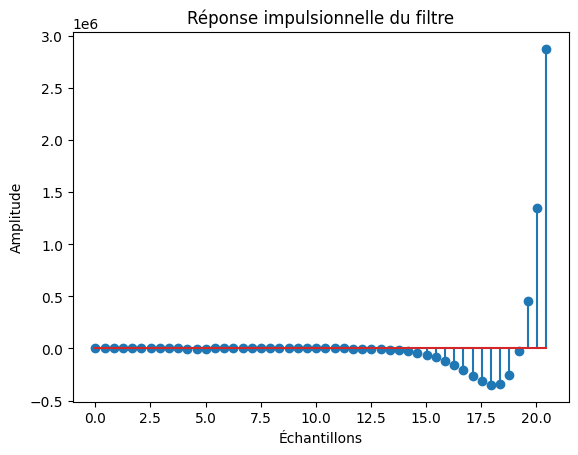

In [33]:
# Réponse impulsionnelle (50 échantillons)
impulse_response = signal.impulse([b, a], N=50)

# Tracé de la réponse impulsionnelle
plt.stem(impulse_response[0], impulse_response[1])
plt.title('Réponse impulsionnelle du filtre')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.show()

## 5. Trace de la fonction de transfert $H(f)$

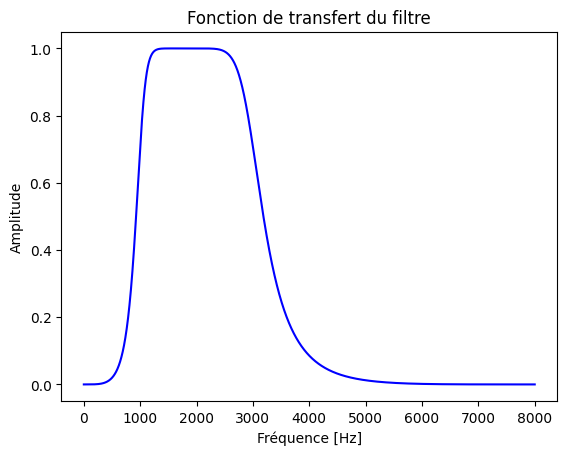

In [35]:
# Tracé de la fonction de transfert
w, h = signal.freqz(b, a, worN=8000)
plt.plot(fs * w / np.pi, np.abs(h), 'b')
plt.title('Fonction de transfert du filtre')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.show()


## 6. Effet de l'augmentation de l'order sur la courbe
On remarque que l'augmentation de l'ordre du filtre fait en sorte de diminuer les deux bandes de transition de la fonction de transfert rapprochant ainsi encore plus le filtre du cas idéal.
Cependant, un très grand ordre du filtre (>20) fait apparaitre deux cas intéressants:
1. Il y a des ordres pour lequels le filtre se transforme en un filtre selectif d'une seule fréquence.
2. D'autres pour lesquels il devient instable avec des amplitudes > 1, et donc pour certaines fréquences sera selectif mais aussi amplifieur.
3. D'autres (quand N très grand) où l'amplitude -> 0 et donc ce filtre élimine n'importe quel signal.  

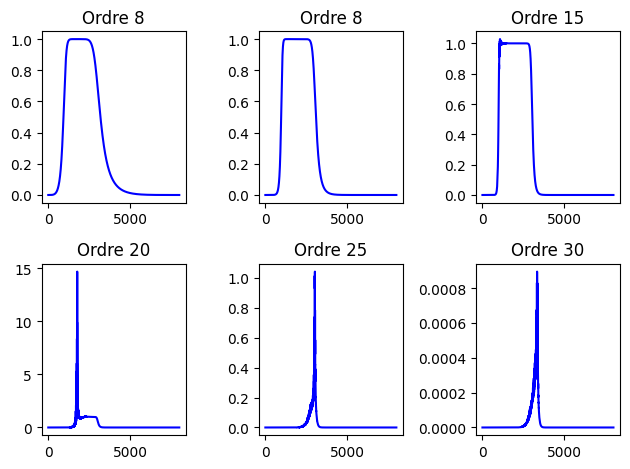

In [60]:
fig, axs = plt.subplots(2, 3)

# Calcul des coefficients du filtre Butterworth avec ordre 4
b, a = coef(4, f_c1_normalized, f_c2_normalized)
w, h = signal.freqz(b, a, worN=8000)
axs[0, 0].plot(fs * w / np.pi, np.abs(h), 'b')
axs[0, 0].set_title('Ordre 8')

# Calcul des coefficients du filtre Butterworth avec ordre 8
b, a = coef(8, f_c1_normalized, f_c2_normalized)
w, h = signal.freqz(b, a, worN=8000)
axs[0, 1].plot(fs * w / np.pi, np.abs(h), 'b')
axs[0, 1].set_title('Ordre 8')


# Calcul des coefficients du filtre Butterworth avec ordre 15
b, a = coef(15, f_c1_normalized, f_c2_normalized)
w, h = signal.freqz(b, a, worN=8000)
axs[0, 2].plot(fs * w / np.pi, np.abs(h), 'b')
axs[0, 2].set_title('Ordre 15')


# Calcul des coefficients du filtre Butterworth avec ordre 20
b, a = coef(20, f_c1_normalized, f_c2_normalized)
w, h = signal.freqz(b, a, worN=8000)
axs[1, 0].plot(fs * w / np.pi, np.abs(h), 'b')
axs[1, 0].set_title('Ordre 20')


# Calcul des coefficients du filtre Butterworth avec ordre 25
b, a = coef(25, f_c1_normalized, f_c2_normalized)
w, h = signal.freqz(b, a, worN=8000)
axs[1, 1].plot(fs * w / np.pi, np.abs(h), 'b')
axs[1, 1].set_title('Ordre 25')

# Calcul des coefficients du filtre Butterworth avec ordre 30
b, a = coef(30, f_c1_normalized, f_c2_normalized)
w, h = signal.freqz(b, a, worN=8000)
axs[1, 2].plot(fs * w / np.pi, np.abs(h), 'b')
axs[1, 2].set_title('Ordre 30')

fig.tight_layout()